# K-means clustering
<hr>

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
filename = 'Assignment 10 data.csv'
feature  = np.genfromtxt(filename, delimiter=',')

x = feature[:, 0]
y = feature[:, 1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)
print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

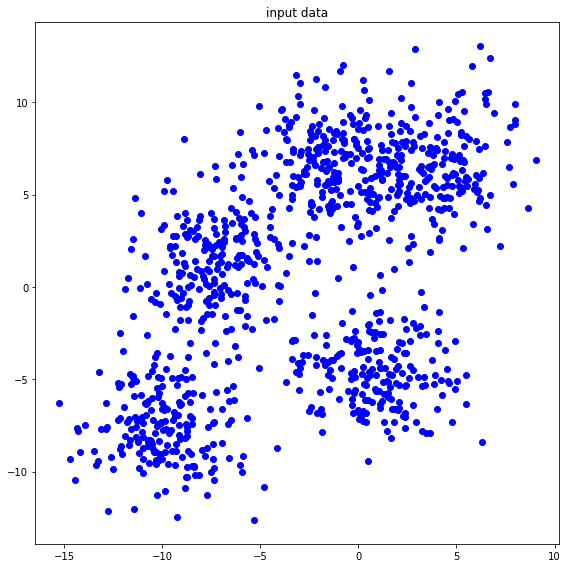

In [3]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.plot(x, y, 'o', color='blue')

plt.tight_layout()
plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [4]:
def compute_distance(feature, center):
    distance = []
    
    for i in range(len(feature)):
        temp = np.sqrt( np.power((feature[i, 0]-center[0]), 2) + np.power((feature[i, 1]-center[1]), 2) )
        distance.append(temp)
        
    distance = np.array(distance)
    return distance

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [5]:
def compute_centroid(feature, label_feature, value_label):
    x, y = 0, 0
    points_num = 0
    
    for i in range(len(feature)):
        if label_feature[i] == value_label:
            x += feature[i, 0] 
            y += feature[i, 1]
            points_num += 1
    
    if points_num != 0:
        x /= points_num
        y /= points_num
    
    centroid = np.array([x, y])
    return centroid

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [6]:
def compute_label(distance):
    label = []
    
    for i in range(len(distance)):
        temp = np.argmin(distance[i, :])
        label.append(temp)
        
    label = np.array(label)
    return label

## compute loss

In [7]:
def compute_loss(feature, label_feature, centroid):
    loss = 0
    
    for k in range(len(centroid)):
        points = []
        for i in range(len(feature)):
            if label_feature[i] == k:
                points.append(feature[i])
        points = np.array(points)
        
        if len(points):
            centers = np.tile(centroid[k], (len(points), 1))
            distance = np.sum( np.square(points - centers) )
        
        loss += distance
        
    loss /= len(feature)
    return loss

## operate iteration

In [8]:
number_cluster      = 10
number_iteration    = 100
distance            = np.zeros(shape=(number_data, number_cluster))

# 초기 centroid 임의로 초기화
centroid            = np.zeros(shape=(number_cluster, number_feature))
for i in range(number_cluster):
    centroid[i][0] = np.random.randn(1)
    centroid[i][1] = np.random.randn(1)

In [9]:
# 초기 centroid 확인
centroid

array([[-1.04735583,  0.11183114],
       [ 0.38789723, -1.17129378],
       [-1.16599972, -0.18209325],
       [ 1.29988002, -0.2769725 ],
       [ 0.09645347,  1.28858365],
       [ 0.5101338 ,  1.37158219],
       [ 0.24479067,  1.32505129],
       [-1.32335782, -0.29205697],
       [-1.15078283, -0.01631433],
       [ 1.86496581, -0.18840218]])

In [10]:
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))

label_feature       = np.zeros(shape=(number_data, 1)) # 각 점들의 label
label_cluster       = [i for i in range(number_cluster)] # label들이 모인 cluster 종류

In [11]:
# 임의로 각 포인트별 클러스터 초기화
label_feature = np.random.randint(0, number_cluster, 1000)

for i in range(number_iteration):
    # centroid 저장
    centroid_iteration[i] = centroid
    
    # distance
    for k in range(number_cluster):
        distance[:, k] = compute_distance(feature, centroid[k])
    # label
    label_feature = compute_label(distance)
    # centroid update
    for k in range(number_cluster):
        centroid[k, :] = compute_centroid(feature, label_feature, k)
        
    # loss 저장    
    loss_iteration[i] = compute_loss(feature, label_feature, centroid) 

## plot the results

In [12]:
def plot_data(feature):
    plt.figure(figsize=(8,8))   
    plt.title('input data')
    
    plt.plot(feature[:, 0], feature[:, 1], 'o', color='blue')
    
    plt.tight_layout()
    plt.show()
    
    
    
def plot_loss_curve(loss_iteration):
    plt.figure(figsize=(8,6))  
    plt.title('loss')
    
    plt.plot(loss_iteration, '-', color='red')
    
    plt.tight_layout()
    plt.show()
    
    
    
def plot_centroid(centroid_iteration):
    plt.figure(figsize=(8,8))   
    plt.title('centroid')
    
    # initial and final points
    iteration = len(centroid_iteration) 
    plt.plot(centroid_iteration[0, :, 0], centroid_iteration[0, :, 1], 'o', color='blue', label='initial')
    plt.plot(centroid_iteration[iteration-1, :, 0], centroid_iteration[iteration-1, :, 1], 's', color='red', label='final')
    
    # centroid iteration
    for i in range(len(centroid_iteration[0])):
        plt.plot(centroid_iteration[:, i, 0], centroid_iteration[:, i, 1], '-', label='cluster={}'.format(i))
        
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    
    
def plot_cluster(feature, label_feature, label_cluster):
    plt.figure(figsize=(8,8))   
    plt.title('cluster')
    
    plt.scatter(feature[:, 0], feature[:, 1], c=label_feature, cmap=plt.cm.get_cmap('Spectral'))
    plt.colorbar(ticks=range(len(label_cluster)), format='%d', label='cluster')
    
    plt.tight_layout()
    plt.show()

# Results
<hr>

## 01. plot the input data

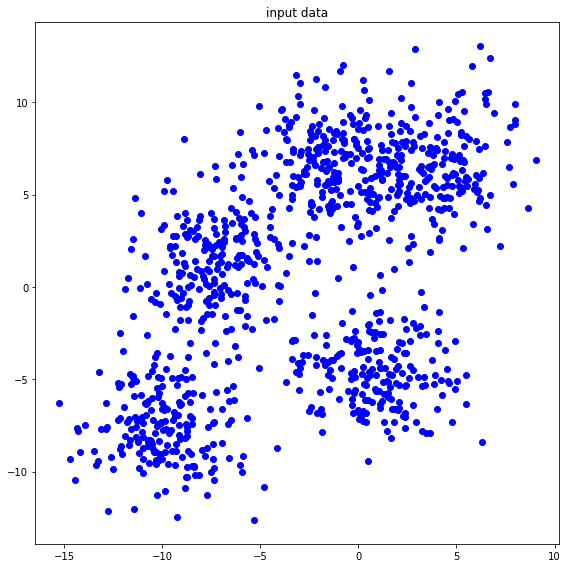

In [13]:
plot_data(feature)

## 02. plot the loss over the iterations with the number of clusters being 5

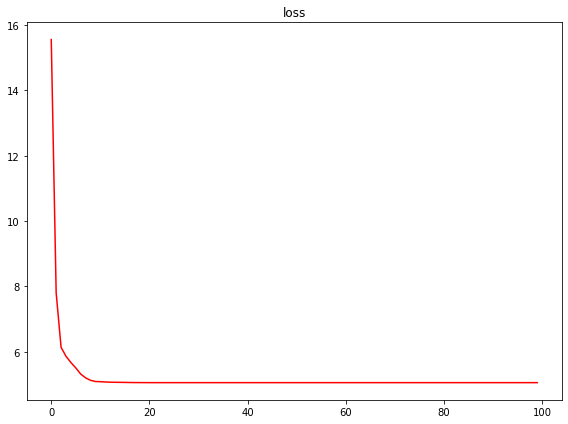

In [14]:
plot_loss_curve(loss_iteration)

## 03. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

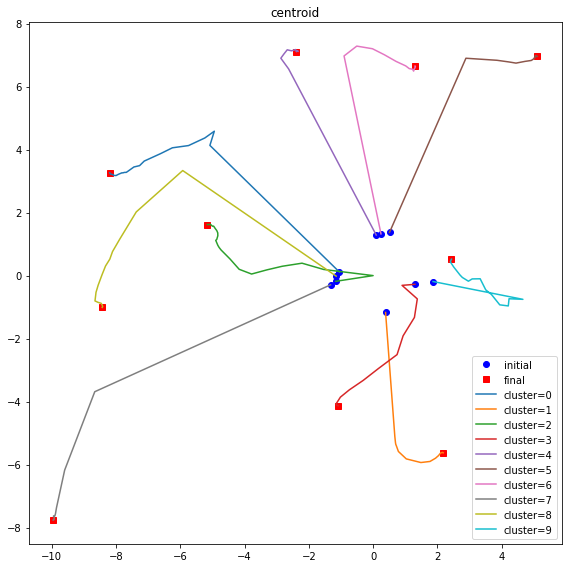

In [15]:
plot_centroid(centroid_iteration)

## 04. plot the final clustering result with the number of clusters being 5

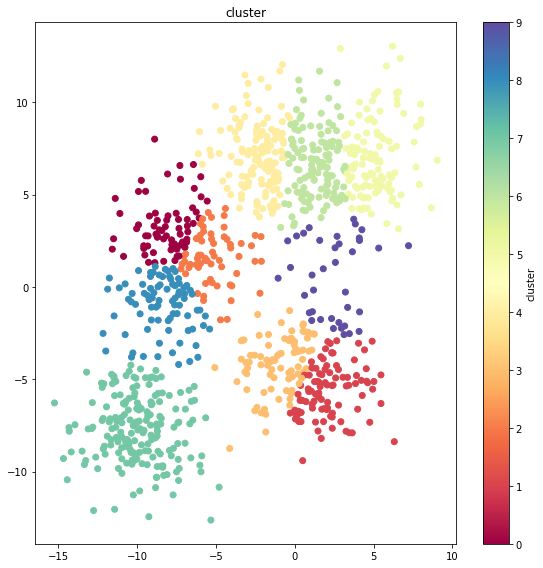

In [16]:
plot_cluster(feature, label_feature, label_cluster)

## 05. plot the loss over the iterations with the number of clusters being 10

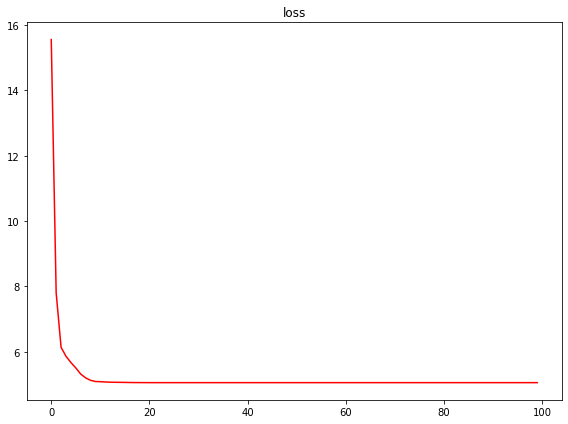

In [17]:
plot_loss_curve(loss_iteration)

## 06. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

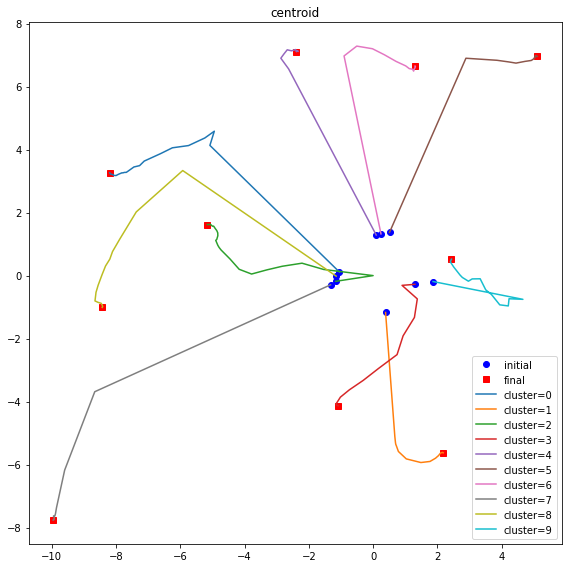

In [18]:
plot_centroid(centroid_iteration)

## 07. plot the final clustering result with the number of clusters being 10

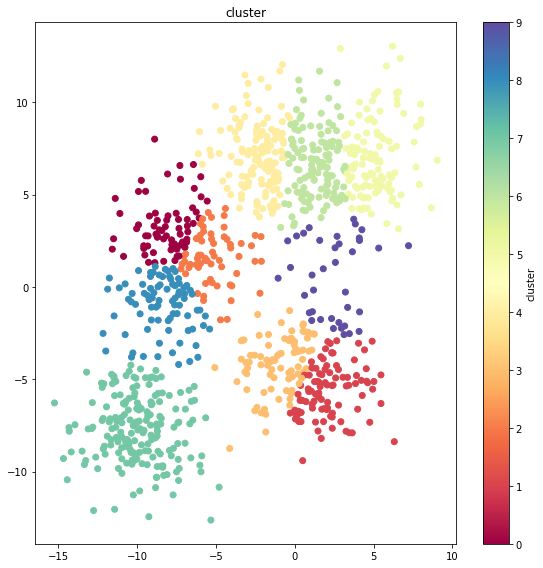

In [19]:
plot_cluster(feature, label_feature, label_cluster)